In [1]:
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\SRV DATOS\miniconda3\envs\pharmacophore\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("./data/wholesale.csv")
df.drop(["Channel", "Region"], axis=1, inplace=True) # drop non-continous variables
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
data = df[["Grocery", "Milk"]]
data = data.to_numpy().astype("float32", copy=False)
print(data.shape)

(440, 2)


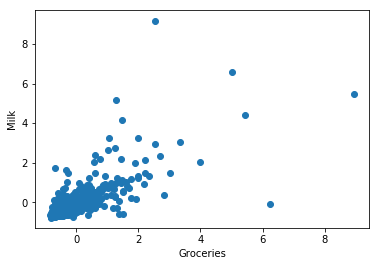

In [4]:
# Normalize data
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
# Plot data
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [11]:
# Construct DBSCAN object
dbsc = DBSCAN(eps=0.5, min_samples=15).fit(data)
labels = dbsc.labels_
print(labels)
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1
  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0

In [6]:
in_cluster = data[core_samples]
in_cluster.shape

(387, 2)

In [9]:
dbsc.components_.shape

(387, 2)

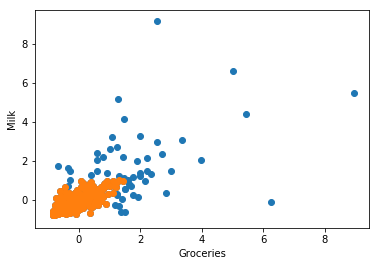

In [22]:
# Plot data
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
# Plot cluster
plt.scatter(in_cluster[:,0], in_cluster[:,1])
plt.show()

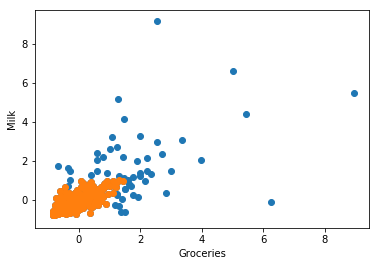

In [10]:
# Plot data
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
# Plot cluster
plt.scatter(dbsc.components_[:,0], dbsc.components_[:,1])
plt.show()